### Assignment 2 - Report - Genetic Algorithms


### Imports and Variables

In [ ]:
import numpy as np

# number of items in our problem
num_items = 20

# hill climbing genotype
genotype = np.random.choice([0, 1], (num_items))
print(genotype)

[1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0]


In [ ]:


max_volume = 40
benefits = np.array([5, 6, 1, 9, 2, 8, 4, 3, 7, 10, 5, 2, 1, 6, 2, 3, 8, 3, 7, 9])
volumes = np.array([3, 2, 4, 5, 8, 9, 10, 1, 6, 7, 5, 2, 8, 5, 3, 7, 4, 1, 10,6])
print(benefits)
print(volumes)

[ 5  6  1  9  2  8  4  3  7 10  5  2  1  6  2  3  8  3  7  9]
[ 3  2  4  5  8  9 10  1  6  7  5  2  8  5  3  7  4  1 10  6]


### Main functions - Fitness, Mutation, Groupfitness

In [ ]:
#Fitness Function
import numpy as np

def fitness_f(genotype, benefits, volumes, max_volume):
  
    # put you fitness calculuations here
    benefits_sum = 0
    volumes_sum = 0
    for i in range(len(genotype)):
      if genotype[i] == 1:
          benefits_sum = benefits_sum + benefits[i]
          volumes_sum = volumes_sum + volumes[i]
      fitness = (benefits_sum * (max_volume - volumes_sum))

    return fitness
  

In [ ]:
#1st Mutation Function
#mutation rate of 0.2
def mutate1(genotype,rate=0.2):
    for i in range(len(genotype)):
        if random.random() <= rate:
          genotype[i] = (1,0)[genotype[i]]
    return genotype

In [ ]:
#2nd Mutation Function
#mutation rate of 0.4
def mutate2(genotype,rate=0.4):
    for i in range(len(genotype)):
        if random.random() <= rate:
          genotype[i] = (1,0)[genotype[i]]
    return genotype

In [ ]:
#3rd Mutation Function
#mutation rate of 0.6
def mutate3(genotype,rate=0.6):
    for i in range(len(genotype)):
        if random.random() <= rate:
          genotype[i] = (1,0)[genotype[i]]
    return genotype

In [ ]:
#4th Mutation Function
#mutation rate of 0.8
def mutate4(genotype,rate=0.8):
    for i in range(len(genotype)):
        if random.random() <= rate:
          genotype[i] = (1,0)[genotype[i]]
    return genotype

In [ ]:
def chosen_fitness(genotypes,fitness):
  for i,genotype in enumerate(genotypes):
    fitness[i] = fitness_f(genotype, benefits, volumes, max_volume)
  return fitness

### Microbial GA 1 - mutation rate **0.2**

The greatest total benefit in a knapsack over 1000 generations is: 792.0
[ 408.  576.  396.  348.  408.  722.  600.  638.  792.  152.  555.  360.
  612.  172.  638.  616. -330.  720.  520.  728.  288. -636.  400.  480.
  102.]


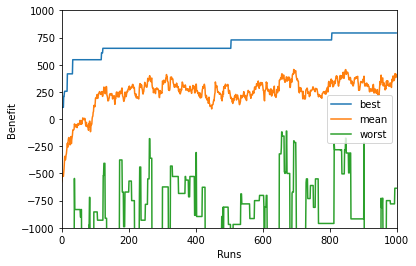

In [ ]:
import numpy as np 
import copy
from copy import deepcopy
import random
import matplotlib.pyplot as plt

#1st Microbial GA
#Uses mutation rate 0.2
runs = 1000
num_genes = 45
num_individuals = 25 

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)
best_fit = 0

x1 = []
y_best1 = []
y_mean1 = []
y_worst1 = []

for run in range(runs):

  rand_ind = random.sample(range(0, len(genotypes)), 2)

  if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
      genotypes[rand_ind[1]] = mutate1(copy.deepcopy(genotypes[rand_ind[0]]))


  else:  
    genotypes[rand_ind[0]] = mutate1(copy.deepcopy(genotypes[rand_ind[1]]))
  

  group_fit1 = chosen_fitness(genotypes, fitness)
  y_best1.append(np.amax(group_fit1))
  y_worst1.append(np.amin(group_fit1))
  y_mean1.append((sum(group_fit1)/len(group_fit1)))
  x1.append(run)

plt.plot(x1,y_best1,label='best')
plt.plot(x1,y_mean1,label='mean')
plt.plot(x1,y_worst1,label='worst')

print(f"The greatest total benefit in a knapsack over {runs} generations is: {np.amax(group_fit1)}")
#print(f"The best total benefit of the population {y_best}")
#print(f"The mean total benefit of the population{y_mean}")
#print(f"The worst total benefit of the population {y_worst}")
print(fitness)
plt.ylim(-1000,1000)
plt.xlim(0,1000)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend()
plt.show()

The average greatest total benefit over 10 trials is: 698.8328
The standard deviation of the average total benefit 10 trials is: 90.33447871195128


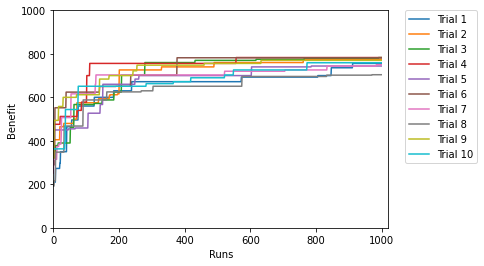

In [ ]:
#1st Microbial GA
#Uses mutation rate 0.2 - 10 trials

trials = 10

runs = 1000
num_genes = 45
num_individuals = 25 
trial_fitness1 = []

for trial in range(trials):

  genotypes = np.random.choice([0, 1], (num_individuals, num_items))
  fitness = np.zeros(num_individuals)

  x1 = []
  y_best1 = []

  for run in range(runs):

    rand_ind = random.sample(range(0, len(genotypes)), 2)

    if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
        genotypes[rand_ind[1]] = mutate1(copy.deepcopy(genotypes[rand_ind[0]]))

    else:  
      genotypes[rand_ind[0]] = mutate1(copy.deepcopy(genotypes[rand_ind[1]]))

    group_fit1 = chosen_fitness(genotypes, fitness)
    y_best1.append(np.amax(group_fit1))
    x1.append(run)
    trial_fitness1.append(y_best1)
  plt.plot(x1,y_best1)
 
best_average1 = np.average(trial_fitness1)
print(f"The average greatest total benefit over {trials} trials is: {best_average1}")

std_average1 = np.std(trial_fitness1)
print(f"The standard deviation of the average total benefit {trials} trials is: {std_average1}")

plt.ylim(0,1000)
plt.xlim(0,1020)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend(('Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Trial 6', 'Trial 7', 'Trial 8', 'Trial 9', 'Trial 10'),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()   



### Microbial GA 2 - mutation rate **0.4**

The greatest total benefit in a knapsack over 1000 generations is: 663.0
[ -611. -1040.  -708.   341.  -168.   252.  -816.    96.     0.   510.
  -795.  -215. -1127.   396.    43.    92.  -550.   403. -1380.   663.
 -1008.  -912.  -704. -1342. -1342.]


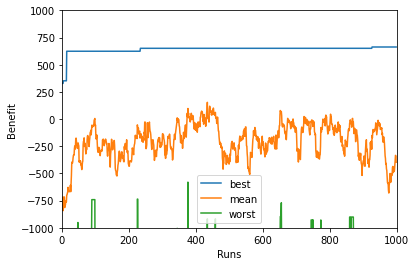

In [ ]:
#2nd Microbial GA
#Uses mutation rate 0.4


runs = 1000
num_genes = 45
num_individuals = 25 

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)
best_fit = 0

x2 = []
y_best2 = []
y_mean2 = []
y_worst2 = []

for run in range(runs):

  rand_ind = random.sample(range(0, len(genotypes)), 2)

  if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
      genotypes[rand_ind[1]] = mutate2(copy.deepcopy(genotypes[rand_ind[0]]))


  else:  
    genotypes[rand_ind[0]] = mutate2(copy.deepcopy(genotypes[rand_ind[1]]))
  

  group_fit2 = chosen_fitness(genotypes, fitness)
  y_best2.append(np.amax(group_fit2))
  y_worst2.append(np.amin(group_fit2))
  y_mean2.append((sum(group_fit2)/len(group_fit2)))
  x2.append(run)

plt.plot(x2,y_best2,label='best')
plt.plot(x2,y_mean2,label='mean')
plt.plot(x2,y_worst2,label='worst')

print(f"The greatest total benefit in a knapsack over {runs} generations is: {np.amax(group_fit2)}")
#print(f"The best total benefit of the population {y_best}")
#print(f"The mean total benefit of the population{y_mean}")
#print(f"The worst total benefit of the population {y_worst}")
print(fitness)
plt.ylim(-1000,1000)
plt.xlim(0,1000)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend()
plt.show()

The average greatest total benefit over 10 trials is: 634.8425
The standard deviation of the average total benefit 10 trials is: 82.559559675122


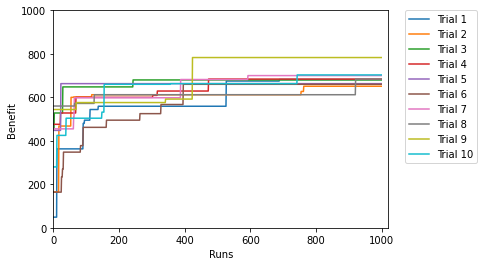

In [ ]:
#2nd Microbial GA
#Uses mutation rate 0.4 - 10 trials

trials = 10

runs = 1000
num_genes = 45
num_individuals = 25 
trial_fitness2 = []

for trial in range(trials):

  genotypes = np.random.choice([0, 1], (num_individuals, num_items))
  fitness = np.zeros(num_individuals)

  x2 = []
  y_best2 = []

  for run in range(runs):

    rand_ind = random.sample(range(0, len(genotypes)), 2)

    if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
        genotypes[rand_ind[1]] = mutate2(copy.deepcopy(genotypes[rand_ind[0]]))

    else:  
      genotypes[rand_ind[0]] = mutate2(copy.deepcopy(genotypes[rand_ind[1]]))

    group_fit2 = chosen_fitness(genotypes, fitness)
    y_best2.append(np.amax(group_fit2))
    x2.append(run)
    trial_fitness2.append(y_best2)
  plt.plot(x2,y_best2)
 
best_average2 = np.average(trial_fitness2)
print(f"The average greatest total benefit over {trials} trials is: {best_average2}")

std_average2 = np.std(trial_fitness2)
print(f"The standard deviation of the average total benefit {trials} trials is: {std_average2}")

plt.ylim(0,1000)
plt.xlim(0,1020)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend(('Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Trial 6', 'Trial 7', 'Trial 8', 'Trial 9', 'Trial 10'),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()   



### Microbial GA 3 - mutation rate **0.6**

The greatest total benefit in a knapsack over 1000 generations is: 700.0
[ -246.     0.    70.   700.   234.   540. -2220. -2886.  -675.   260.
    50.   234.  -605. -1584. -1012.   147.  -728.   560.   230.  -728.
  -240.   312. -1100. -1643. -1587.]


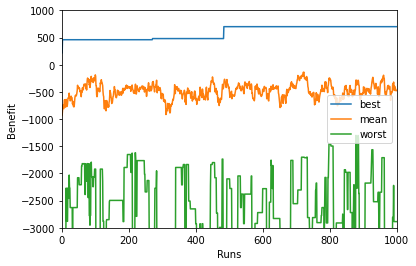

In [ ]:
#3rd Microbial GA
#Uses mutation rate 0.6

runs = 1000
num_genes = 45
num_individuals = 25 

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)
best_fit = 0

x3 = []
y_best3 = []
y_mean3 = []
y_worst3 = []

for run in range(runs):

  rand_ind = random.sample(range(0, len(genotypes)), 2)

  if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
      genotypes[rand_ind[1]] = mutate3(copy.deepcopy(genotypes[rand_ind[0]]))


  else:  
    genotypes[rand_ind[0]] = mutate3(copy.deepcopy(genotypes[rand_ind[1]]))
  

  group_fit3 = chosen_fitness(genotypes, fitness)
  y_best3.append(np.amax(group_fit3))
  y_worst3.append(np.amin(group_fit3))
  y_mean3.append((sum(group_fit3)/len(group_fit3)))
  x3.append(run)

plt.plot(x3,y_best3,label='best')
plt.plot(x3,y_mean3,label='mean')
plt.plot(x3,y_worst3,label='worst')

print(f"The greatest total benefit in a knapsack over {runs} generations is: {np.amax(group_fit3)}")
#print(f"The best total benefit of the population {y_best}")
#print(f"The mean total benefit of the population{y_mean}")
#print(f"The worst total benefit of the population {y_worst}")
print(fitness)
plt.ylim(-3000,1000)
plt.xlim(0,1000)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend()
plt.show()

The average greatest total benefit over 10 trials is: 566.6269
The standard deviation of the average total benefit 10 trials is: 77.26314837223495


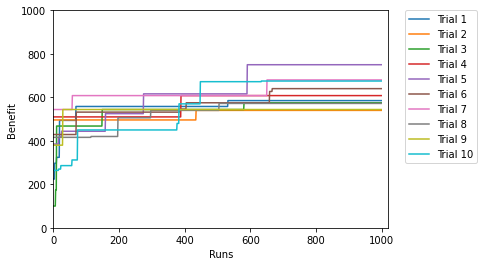

In [ ]:
#3rd Microbial GA
#Uses mutation rate 0.6 - 10 trials

#2nd Microbial GA
#Uses mutation rate 0.4 - 10 trials

trials = 10

runs = 1000
num_genes = 45
num_individuals = 25 
trial_fitness3 = []

for trial in range(trials):

  genotypes = np.random.choice([0, 1], (num_individuals, num_items))
  fitness = np.zeros(num_individuals)

  x3 = []
  y_best3 = []

  for run in range(runs):

    rand_ind = random.sample(range(0, len(genotypes)), 2)

    if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
        genotypes[rand_ind[1]] = mutate3(copy.deepcopy(genotypes[rand_ind[0]]))

    else:  
      genotypes[rand_ind[0]] = mutate3(copy.deepcopy(genotypes[rand_ind[1]]))

    group_fit3 = chosen_fitness(genotypes, fitness)
    y_best3.append(np.amax(group_fit3))
    x3.append(run)
    trial_fitness3.append(y_best3)
  plt.plot(x3,y_best3)
 
best_average3 = np.average(trial_fitness3)
print(f"The average greatest total benefit over {trials} trials is: {best_average3}")

std_average3 = np.std(trial_fitness3)
print(f"The standard deviation of the average total benefit {trials} trials is: {std_average3}")

plt.ylim(0,1000)
plt.xlim(0,1020)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend(('Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Trial 6', 'Trial 7', 'Trial 8', 'Trial 9', 'Trial 10'),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()   



### Microbial GA 4 - mutation rate **0.8**

The greatest total benefit in a knapsack over 1000 generations is: 697.0
[ -484.  -936.   330.   442.  -304.   697.   333.  -168.   434.   187.
  -276.  -561. -1560.  -672.  -720.  -576.  -728. -1428.   660.  -495.
  -600.  -686. -1232.     0.  -484.]


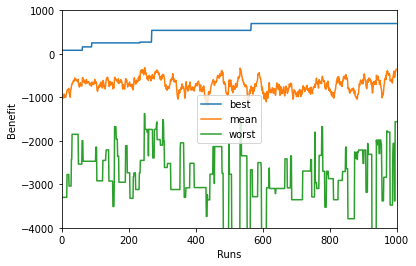

In [ ]:
#4th Microbial GA
#Uses mutation rate 0.8

runs = 1000
num_genes = 45
num_individuals = 25 



genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)


x4 = []
y_best4 = []
y_mean4 = []
y_worst4 = []


for run in range(runs):

  rand_ind = random.sample(range(0, len(genotypes)), 2)

  if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
      genotypes[rand_ind[1]] = mutate4(copy.deepcopy(genotypes[rand_ind[0]]))


  else:  
      genotypes[rand_ind[0]] = mutate4(copy.deepcopy(genotypes[rand_ind[1]]))
  

  group_fit4 = chosen_fitness(genotypes, fitness)
  y_best4.append(np.amax(group_fit4))
  y_worst4.append(np.amin(group_fit4))
  y_mean4.append((sum(group_fit4)/len(group_fit4)))
  x4.append(run)

plt.plot(x4,y_best4,label='best')
plt.plot(x4,y_mean4,label='mean')
plt.plot(x4,y_worst4,label='worst')

print(f"The greatest total benefit in a knapsack over {runs} generations is: {np.amax(group_fit4)}")
#print(f"The best total benefit of the population {y_best}")
#print(f"The mean total benefit of the population{y_mean}")
#print(f"The worst total benefit of the population {y_worst}")
print(fitness)
plt.ylim(-4000,1000)
plt.xlim(0,1000)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend()
plt.show()

The average greatest total benefit over 10 trials is: 533.6743
The standard deviation of the average total benefit 10 trials is: 85.01327790121972


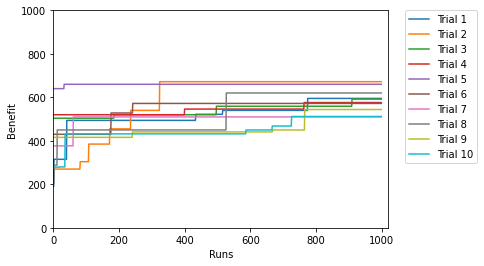

In [ ]:
#4th Microbial GA
#Uses mutation rate 0.8 - 10 trials

#2nd Microbial GA
#Uses mutation rate 0.4 - 10 trials

trials = 10

runs = 1000
num_genes = 45
num_individuals = 25 
trial_fitness4 = []

for trial in range(trials):

  genotypes = np.random.choice([0, 1], (num_individuals, num_items))
  fitness = np.zeros(num_individuals)

  x4 = []
  y_best4 = []

  for run in range(runs):

    rand_ind = random.sample(range(0, len(genotypes)), 2)

    if fitness_f(genotypes[rand_ind[0]], benefits, volumes, max_volume) > fitness_f(genotypes[rand_ind[1]], benefits, volumes, max_volume):
        genotypes[rand_ind[1]] = mutate4(copy.deepcopy(genotypes[rand_ind[0]]))

    else:  
      genotypes[rand_ind[0]] = mutate4(copy.deepcopy(genotypes[rand_ind[1]]))

    group_fit4 = chosen_fitness(genotypes, fitness)
    y_best4.append(np.amax(group_fit4))
    x4.append(run)
    trial_fitness4.append(y_best4)
  plt.plot(x4,y_best4)
 
best_average4 = np.average(trial_fitness4)
print(f"The average greatest total benefit over {trials} trials is: {best_average4}")

std_average4 = np.std(trial_fitness4)
print(f"The standard deviation of the average total benefit {trials} trials is: {std_average4}")

plt.ylim(0,1000)
plt.xlim(0,1020)
plt.xlabel("Runs")
plt.ylabel("Benefit")
plt.legend(('Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Trial 6', 'Trial 7', 'Trial 8', 'Trial 9', 'Trial 10'),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()   



Bar Chart - comparing greatest fitness over epochs

In [ ]:
#bar chart - including error
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0.2', '0.4', '0.6', '0.8']
average_greatest_benefit = [698.8328,634.8425,566.6269,533.6743]
error = [90.33447871195128,82.559559675122, 77.26314837223495, 85.01327790121972]
ax.bar(langs,average_greatest_benefit,yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
barlist=ax.bar(langs,average_greatest_benefit)
barlist[0].set_color('red')
barlist[1].set_color('blue')
barlist[2].set_color('green')
barlist[3].set_color('orange')
plt.xlabel("Mutation Rate")
plt.ylabel("Fitness")
plt.show()